In [ ]:
import numpy as np
import pandas as pd
import os
os.listdir()
import matplotlib.pyplot as plt

In [ ]:
os.getcwd()

'/content'

In [ ]:
data = pd.read_csv('train.csv')
data.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


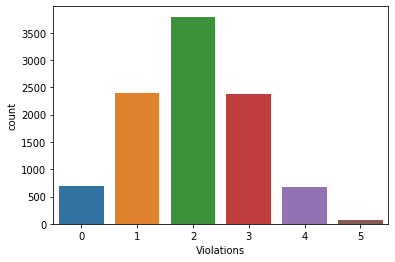

In [ ]:
import seaborn as sns

sns.countplot(x="Violations",data=data)

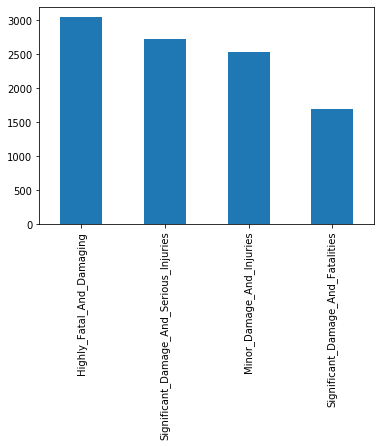

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
data['Severity'].value_counts().plot(ax=ax, kind='bar')

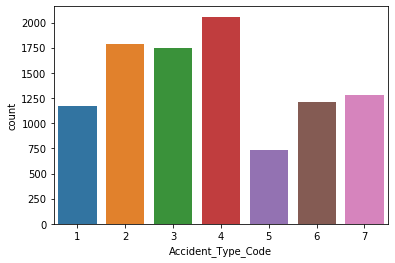

In [ ]:
sns.countplot(x="Accident_Type_Code",data=data)

In [ ]:
target = data['Severity']
data = data.drop(['Severity','Cabin_Temperature','Accident_ID'],axis = 'columns')
print(data.head())
print(target)
data.info()

   Safety_Score  Days_Since_Inspection  ...  Violations  Adverse_Weather_Metric
0     49.223744                     14  ...           3                0.424352
1     62.465753                     10  ...           2                0.352350
2     63.059361                     13  ...           3                0.003364
3     48.082192                     11  ...           1                0.211728
4     26.484018                     13  ...           2                0.176883

[5 rows x 9 columns]
0                     Minor_Damage_And_Injuries
1                     Minor_Damage_And_Injuries
2             Significant_Damage_And_Fatalities
3       Significant_Damage_And_Serious_Injuries
4             Significant_Damage_And_Fatalities
                         ...                   
9995    Significant_Damage_And_Serious_Injuries
9996                  Highly_Fatal_And_Damaging
9997    Significant_Damage_And_Serious_Injuries
9998                  Minor_Damage_And_Injuries
9999              

In [ ]:
from sklearn.feature_selection import SelectKBest,f_classif
selector = SelectKBest(score_func = f_classif,k=7)
data_sel = selector.fit_transform(data,target)
#print(data_sel.shape)
#print(np.log10(selector.scores_))
print(selector.scores_)
#print(data_sel)

(10000, 7)
[2.72536317 0.90766168 0.38312895 2.21509918 1.7598087  2.39558369
 0.65761715 1.23893464 1.98602752]
[531.32857516   8.08465849   2.41617814 164.09644616  57.51865241
 248.64726529   4.54587146  17.33543099  96.83392121]
[[4.92237443e+01 1.40000000e+01 7.12853236e+01 ... 2.00000000e+00
  3.00000000e+00 4.24352083e-01]
 [6.24657534e+01 1.00000000e+01 7.22880583e+01 ... 2.00000000e+00
  2.00000000e+00 3.52349973e-01]
 [6.30593607e+01 1.30000000e+01 6.63628077e+01 ... 7.00000000e+00
  3.00000000e+00 3.36390699e-03]
 ...
 [2.78538813e+01 1.70000000e+01 6.95989061e+01 ... 3.00000000e+00
  3.00000000e+00 1.68173043e-01]
 [5.62100457e+01 8.00000000e+00 3.98359161e+01 ... 5.00000000e+00
  2.00000000e+00 2.63809289e-02]
 [5.00000000e+01 1.30000000e+01 4.54876937e+01 ... 5.00000000e+00
  2.00000000e+00 1.70358910e-02]]


In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(data_sel,target,test_size = 0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
Xscaled = StandardScaler().fit_transform(Xtrain)
print(Xscaled) 
Xtest = StandardScaler().fit_transform(Xtest)
print(Xtest[0])

[[ 6.54367912e-01 -1.11396609e+00  1.42756471e+00 ... -4.34361274e-01
  -9.63602939e-01 -2.37347231e-01]
 [-2.01289356e+00  1.70067882e+00 -1.28417796e+00 ...  9.25364049e-02
  -9.63602939e-01 -4.80947663e-01]
 [-3.49744307e-01 -5.51037107e-01  1.19743096e+00 ...  9.25364049e-02
   9.64808196e-01 -5.43497462e-01]
 ...
 [ 3.21011848e-02 -2.69572616e-01 -7.74048149e-01 ... -4.34361274e-01
  -1.92780851e+00 -4.68167190e-01]
 [ 2.32923629e-01  1.41921433e+00 -6.35967900e-01 ...  1.67322944e+00
   6.02628480e-04 -6.59384767e-01]
 [-1.49245230e+00  8.56285347e-01 -2.52411654e-01 ... -9.61258953e-01
  -1.92780851e+00  2.63257306e-01]]
[-0.73093385  0.91139815  1.09661466  0.38543978 -1.44618333  0.89232259
  1.63229973]


In [ ]:
from sklearn.metrics import accuracy_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
for clf in [LogisticRegression(),DecisionTreeClassifier(),LinearSVC()]:
 clf.fit(Xscaled,ytrain)
 ypredtrain = clf.predict(Xscaled)
 print(str(clf)+':')
 print(100*(f1_score(ytrain,ypredtrain,average = 'weighted')))
 ypredtest = clf.predict(Xtest)
 print(100*(f1_score(ytest,ypredtest,average = 'weighted')))
 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False):
63.29280098601715
63.13174472173014
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'):
100.0
89.08014617359436
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
cl = LinearSVC(max_iter = 2000)
cl.fit(Xscaled,ytrain)
ypredltr = c.predict(Xscaled)
ypredlte = c.predict(Xtest)
print(accuracy_score(ytrain,ypredltr))
print(accuracy_score(ytest,ypredlte))

0.915
0.9035


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(Xscaled,ytrain)
ypredtrain = clf.predict(Xscaled)
ypredtest = clf.predict(Xtest)
print(accuracy_score(ytrain,ypredtrain))
print(accuracy_score(ytest,ypredtest))

1.0
0.8875


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=4,algorithm='auto')
neigh.fit(Xscaled, ytrain)
print(accuracy_score(ytrain,neigh.predict(Xscaled)))
print(accuracy_score(ytest,neigh.predict(Xtest)))
print(neigh)

0.884125
0.797
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')


In [ ]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import accuracy_score,make_scorer
#params = {'kernel':['poly','rbf','sigmoid'],'degree':[3,5,6],'gamma':['auto','scale'],'C':[0.01,0.1,1]}
#scorer = make_scorer(accuracy_score)
#go = GridSearchCV(estimator=SVC(),param_grid=params,scoring=scorer,n_jobs=-1)
#go.fit(Xscaled,ytrain)
#print(go.best_params_)

In [ ]:
#est = go.best_estimator_
#est.fit(Xscaled,ytrain)
#print(accuracy_score(ytrain,c.predict(Xscaled)))
#print(accuracy_score(ytest,c.predict(Xtest)))
#print(est)

In [ ]:
from sklearn.svm import SVC
c = SVC(kernel='rbf',degree=3,gamma='auto')
c.fit(Xscaled,ytrain)
print(accuracy_score(ytrain,c.predict(Xscaled)))
print(accuracy_score(ytest,c.predict(Xtest)))
print(c)

0.914875
0.8925
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
data_test = pd.read_csv('test.csv')
acc =  data_test['Accident_ID']
acc

0           1
1          10
2          14
3          17
4          21
        ...  
2495    12484
2496    12487
2497    12488
2498    12491
2499    12493
Name: Accident_ID, Length: 2500, dtype: int64

In [ ]:
data_test1 = data_test.drop(['Cabin_Temperature','Accident_ID','Total_Safety_Complaints','Max_Elevation'],axis = 'columns')
data_test1 = StandardScaler().fit_transform(data_test1)
pred = c.predict(data_test1)
pred1 = pd.Series(pred)
print(pred1)

0                     Highly_Fatal_And_Damaging
1             Significant_Damage_And_Fatalities
2       Significant_Damage_And_Serious_Injuries
3                     Highly_Fatal_And_Damaging
4                     Highly_Fatal_And_Damaging
                         ...                   
2495                  Highly_Fatal_And_Damaging
2496    Significant_Damage_And_Serious_Injuries
2497    Significant_Damage_And_Serious_Injuries
2498    Significant_Damage_And_Serious_Injuries
2499                  Highly_Fatal_And_Damaging
Length: 2500, dtype: object


In [ ]:
dict = {'Accident_ID' : acc, 'Severity' : pred1}
df = pd.DataFrame(dict)
print(df)
df.to_csv('prediction.csv',index = False)


      Accident_ID                                 Severity
0               1                Highly_Fatal_And_Damaging
1              10        Significant_Damage_And_Fatalities
2              14  Significant_Damage_And_Serious_Injuries
3              17                Highly_Fatal_And_Damaging
4              21                Highly_Fatal_And_Damaging
...           ...                                      ...
2495        12484                Highly_Fatal_And_Damaging
2496        12487  Significant_Damage_And_Serious_Injuries
2497        12488  Significant_Damage_And_Serious_Injuries
2498        12491  Significant_Damage_And_Serious_Injuries
2499        12493                Highly_Fatal_And_Damaging

[2500 rows x 2 columns]
